In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta
import numpy as np

In [2]:
juvenile_df = pd.read_csv('../Data/juvenile_clean.csv', index_col = 0, dtype={8: str})

In [3]:
juvenile_df['CheckoutDate'] = pd.to_datetime(juvenile_df['CheckoutDate'])

## General Data Description

In [4]:
juvenile_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6443528 entries, 0 to 6443527
Data columns (total 25 columns):
 #   Column           Dtype         
---  ------           -----         
 0   UsageClass       object        
 1   CheckoutType     object        
 2   MaterialType     object        
 3   CheckoutYear     int64         
 4   CheckoutMonth    int64         
 5   Checkouts        int64         
 6   Title            object        
 7   ISBN             object        
 8   Creator          object        
 9   Subjects         object        
 10  Publisher        object        
 11  PublicationYear  object        
 12  TitleNotes       object        
 13  CheckoutDate     datetime64[ns]
 14  CreatorName      object        
 15  CopyrightList    object        
 16  CopyrightDate    float64       
 17  PCopyrightList   object        
 18  PCopyrightDate   float64       
 19  PrintingDate     float64       
 20  ApproxDate       float64       
 21  PubDate          float64       
 22 

In [5]:
juvenile_df['UsageClass'].value_counts(dropna=False)

UsageClass
Physical    4528917
Digital     1914611
Name: count, dtype: int64

In [6]:
juvenile_df['CheckoutType'].value_counts(dropna=False)

CheckoutType
Horizon      4528917
OverDrive    1914611
Name: count, dtype: int64

In [7]:
juvenile_df['MaterialType'].value_counts(dropna=False)

MaterialType
Book                       4213582
Ebook                      1416036
Audiobook                   497245
Sounddisc                   195479
Videodisc                    80975
Regprint                     18926
Soundrec                      5799
Er, Soundrec                  4618
Soundcass                     4411
Visual                        1030
Video                          955
Videocass                      654
Er, Sounddisc                  591
Er                             477
Kit                            467
Musicsndrec                    397
Music                          375
Unspecified                    362
Sounddisc, Videodisc           249
Largeprint                     181
Regprint, Sounddisc            179
Mixed                          176
Regprint, Videorec             114
Er, Videodisc                  111
Flashcard, Sounddisc            99
Er, Sounddisc, Soundrec         40
Name: count, dtype: int64

In [8]:
phys_books = ['Book', 'Regprint', 'Largeprint', 'Regprint, Sounddisc']
ebooks = ['Ebook']
audiobooks = ['Audiobook', 'Er', 'Er, Soundrec', 'Er, Sounddisc', 'Sounddisc', 'Soundrec', 'Soundcass', 'Er, Sounddisc, Soundrec']
music = ['Musicsndrec', 'Music']
videos = ['Visual', 'Video', 'Videocass', 'Er, Videodisc', 'Videodisc']
other = ['Kit', 'Unspecified', 'Sounddisc, Videodisc', 'Mixed', 'Regprint, Videorec', 'Flashcard, Sounddisc']

In [9]:
juvenile_df['MaterialCategory'] = np.where(juvenile_df.MaterialType.isin(phys_books), 'Book',
                                             np.where(juvenile_df.MaterialType.isin(ebooks), 'E-book',
                                                      np.where(juvenile_df.MaterialType.isin(audiobooks), 'Audiobook',
                                                               np.where(juvenile_df.MaterialType.isin(music), 'Music',
                                                                        np.where(juvenile_df.MaterialType.isin(videos), 'Video',
                                                                                 np.where(juvenile_df.MaterialType.isin(other), 'Other', np.nan))))))

In [10]:
juvenile_df['MaterialCategory'].value_counts()

MaterialCategory
Book         4232868
E-book       1416036
Audiobook     708660
Video          83725
Other           1467
Music            772
Name: count, dtype: int64

In [11]:
juvenile_df['CheckoutDate'].describe()

count                          6443528
mean     2018-01-15 22:05:10.878637312
min                2005-04-01 00:00:00
25%                2014-05-01 00:00:00
50%                2018-08-01 00:00:00
75%                2022-08-01 00:00:00
max                2025-11-01 00:00:00
Name: CheckoutDate, dtype: object

## Identifying Popular Books

### Overall top books

In [12]:
top10_overall = juvenile_df.groupby(['CreatorName', 'Title'], as_index = False)['Checkouts'].sum().sort_values('Checkouts', ascending = False).head(10).rename(columns = {'Checkouts': 'TotalCheckouts'})

In [13]:
top10_overall = pd.merge(top10_overall, juvenile_df.groupby(['CreatorName', 'Title', 'UsageClass'], as_index = False)['Checkouts'].sum(), how = 'inner', on = ['CreatorName', 'Title']).pivot(index = ['CreatorName', 'Title', 'TotalCheckouts'], columns = 'UsageClass', values = 'Checkouts').reset_index().sort_values('TotalCheckouts', ascending = False).reset_index(drop = True)

In [14]:
top10_overall

UsageClass,CreatorName,Title,TotalCheckouts,Digital,Physical
0,R. J. Palacio,Wonder,15158,7592.0,7566.0
1,J. K. Rowling,Harry Potter And The Sorcerer's Stone,14270,2676.0,11594.0
2,Mo Willems,Are You Ready To Play Outside?,12774,NaN,12774.0
3,Madeleine L'Engle,A Wrinkle In Time,12586,3710.0,8876.0
4,Mo Willems,Pigs Make Me Sneeze!,12068,NaN,12068.0
5,Mo Willems,There Is A Bird On Your Head!,12038,NaN,12038.0
6,J. K. Rowling,Harry Potter And The Chamber Of Secrets,12037,2802.0,9235.0
7,Mo Willems,I Love My New Toy!,11806,NaN,11806.0
8,Mo Willems,My Friend Is Sad,11684,NaN,11684.0
9,Mo Willems,I Will Surprise My Friend!,11593,NaN,11593.0


In [15]:
top10_overall[['Title', 'CreatorName']]

UsageClass,Title,CreatorName
0,Wonder,R. J. Palacio
1,Harry Potter And The Sorcerer's Stone,J. K. Rowling
2,Are You Ready To Play Outside?,Mo Willems
3,A Wrinkle In Time,Madeleine L'Engle
4,Pigs Make Me Sneeze!,Mo Willems
5,There Is A Bird On Your Head!,Mo Willems
6,Harry Potter And The Chamber Of Secrets,J. K. Rowling
7,I Love My New Toy!,Mo Willems
8,My Friend Is Sad,Mo Willems
9,I Will Surprise My Friend!,Mo Willems


Text(0, 0.5, 'Monthly Checkouts')

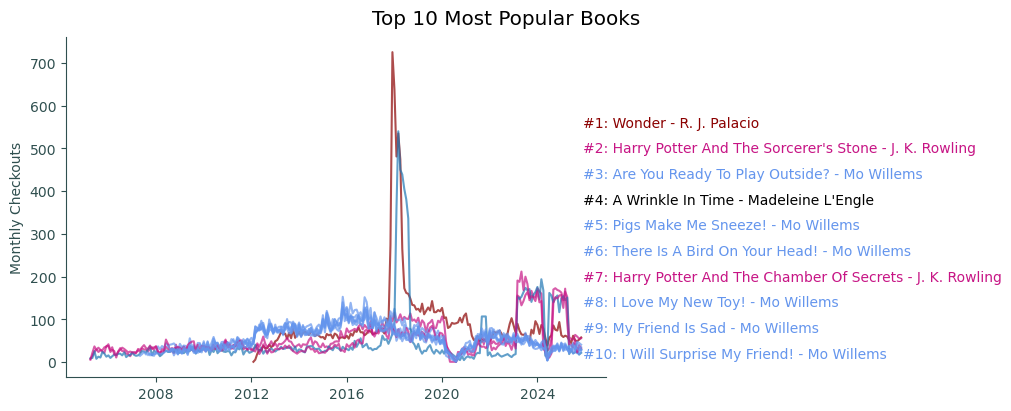

In [16]:
## Narrow down the data to graph
top10_OT = pd.merge(juvenile_df, top10_overall, how = 'inner', on = ['CreatorName', 'Title'])

## Build the graph
fig, ax = plt.subplots(figsize = (10,4), layout = 'constrained')

colors = {'J. K. Rowling': 'MediumVioletRed', 'R. J. Palacio': 'DarkRed', 'Mo Willems': 'CornflowerBlue', 'Bill Martin': 'Navy'}

for i, r in top10_overall.iterrows():
    title = r['Title']
    author = r['CreatorName']

    filtered = top10_OT.loc[top10_OT['Title'] == title].groupby(['Title', 'CreatorName', 'CheckoutDate'], as_index = False)['Checkouts'].sum()
    plt.plot(filtered['CheckoutDate'], filtered['Checkouts'], 
             color = colors.get(author), label = title, alpha = .7)

    plt.text(s = '#' + str(i+1) + ': ' + title + ' - ' + author, x = filtered['CheckoutDate'].max() + timedelta(days = 25), 
             y = 550 - (i*60) ##filtered.loc[filtered['CheckoutDate'] == filtered['CheckoutDate'].max(), 'Checkouts']
             , color = colors.get(author))


## Graph title
fig.suptitle('Top 10 Most Popular Books', size = 'x-large', color = 'black')

## axis customization:
ax.tick_params(axis = 'x', colors = 'darkslategray', labelrotation = 0)
ax.spines[['top', 'right']].set_visible(False)
ax.spines[['left', 'bottom']].set_color('darkslategray')
ax.tick_params(axis = 'y', colors = 'darkslategray', labelrotation = 0)
ax.tick_params(axis = 'x', colors = 'darkslategray')
ax.set_ylabel('Monthly Checkouts', color = 'darkslategray')

##plt.savefig('', transparent = True) 

### Top monthly checkout numbers

In [17]:
top_monthly_checkouts = juvenile_df.groupby(['CreatorName', 'Title', 'CheckoutDate'], as_index = False)['Checkouts'].sum().sort_values('Checkouts', ascending = False).rename(columns = {'Checkouts': 'MonthlyCheckouts'}).head(10)

In [18]:
top_monthly_checkouts = pd.merge(top_monthly_checkouts, juvenile_df.groupby(['CreatorName', 'Title', 'CheckoutDate', 'UsageClass'], as_index = False)['Checkouts'].sum(), how = 'inner', on = ['CreatorName', 'Title', 'CheckoutDate']).pivot(index = ['CreatorName', 'Title', 'CheckoutDate', 'MonthlyCheckouts'], columns = 'UsageClass', values = 'Checkouts').reset_index().sort_values('MonthlyCheckouts', ascending = False).reset_index(drop = True)

In [19]:
top_monthly_checkouts

UsageClass,CreatorName,Title,CheckoutDate,MonthlyCheckouts,Digital,Physical
0,J. K. Rowling,Harry Potter And The Sorcerer's Stone: Harry P...,2020-04-01,2637,2637.0,NaN
1,J. K. Rowling,Harry Potter And The Sorcerer's Stone: Harry P...,2020-05-01,1534,1534.0,NaN
2,J. K. Rowling,Harry Potter And The Sorcerer's Stone: Harry P...,2020-06-01,1081,1081.0,NaN
3,Christina Diaz Gonzalez,Invisible: A Graphic Novel,2023-11-01,850,850.0,NaN
4,Jeff Kinney,Hot Mess,2024-11-01,780,764.0,16.0
5,John Green,Turtles All The Way Down,2017-12-01,777,NaN,777.0
6,Andrea Davis Pinkney,The Red Pencil,2018-11-01,752,729.0,23.0
7,R. J. Palacio,Wonder,2017-12-01,725,63.0,662.0
8,John Green,Turtles All The Way Down,2018-01-01,654,NaN,654.0
9,R. J. Palacio,Wonder,2018-01-01,638,76.0,562.0


In [23]:
juvenile_df.loc[(juvenile_df.CreatorName == 'J. K. Rowling') & (juvenile_df.Title.str.contains('Stone')), 'Title'].unique()

array(["Harry Potter And The Sorcerer's Stone",
       "Haeri Pʻotʻŏ Wa Mabŏpsa Ŭi Tol = Harry Potter And The Philosopher's Stone",
       "Ha Li Bo Te : Shen Mi De Mo Fa Shi = Harry Potter And The Philosopher's Stone",
       "Christmas At Hogwarts : From Harry Potter And The Sorcerer's Stone",
       "Harry Potter And The Sorcerer's Stone:",
       "Harry Potter And The Sorcerer's Stone [sound Recording]",
       "Hali Bote Yu Mo Fa Shi = Harry Potter And The Philosopher's Stone",
       "Harry Potter And The Sorcerer's Stone [text (large Print)]",
       "Harry Potter And The Sorcerer's Stone: Harry Potter Series, Book 1",
       "해리 포터와 마법사의 돌 (harry Potter And The Philosopher's Stone): Harry Potter Series, Book 1"],
      dtype=object)

In [20]:
top_monthly_checkouts.loc[top_monthly_checkouts.CreatorName == 'J. K. Rowling', 'Title'].unique()

array(["Harry Potter And The Sorcerer's Stone: Harry Potter Series, Book 1"],
      dtype=object)

### Top books each year

In [ ]:
top5_per_year = pd.DataFrame()

for year in juvenile_df.CheckoutYear.unique():
    ## check number of months with data for that year, and only compare complete years
    months = juvenile_df.loc[juvenile_df['CheckoutYear'] == year, 'CheckoutMonth'].unique()
    if len(months) == 12:
        df = juvenile_df.loc[juvenile_df['CheckoutYear'] == year].groupby(['CheckoutYear', 'CreatorName', 'Title'], as_index = False)['Checkouts'].sum().sort_values('Checkouts', ascending = False).head(5)
        df['Rank'] = [1, 2, 3, 4, 5]
        top5_per_year = pd.concat([top5_per_year, df])

In [ ]:
top5_per_year.CheckoutYear.unique()

In [ ]:
top5_per_year

In [ ]:
top5_per_year.loc[top5_per_year['CheckoutYear'] == 2006]

In [ ]:
top5_per_year.loc[top5_per_year['CheckoutYear'] == 2007]

In [ ]:
top5_per_year.loc[top5_per_year['CheckoutYear'] == 2008]

In [ ]:
top5_per_year.loc[top5_per_year['CheckoutYear'] == 2009]

In [ ]:
top5_per_year.loc[top5_per_year['CheckoutYear'] == 2010]

In [ ]:
top5_per_year.loc[top5_per_year['CheckoutYear'] == 2011]

In [ ]:
top5_per_year.loc[top5_per_year['CheckoutYear'] == 2012]

In [ ]:
top5_per_year.loc[top5_per_year['CheckoutYear'] == 2013]

In [ ]:
top5_per_year.loc[top5_per_year['CheckoutYear'] == 2014]

In [ ]:
top5_per_year.loc[top5_per_year['CheckoutYear'] == 2015]

In [ ]:
top5_per_year.loc[top5_per_year['CheckoutYear'] == 2016]